<a href="https://colab.research.google.com/github/AlineNascimento/GEE_codes/blob/main/Download_data_GEE_Terraclimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criado por Aline Andrade do Nascimento
alinephysics@gmail.com

#Importação da bibliotecas

In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
time: 483 µs (started: 2022-12-28 11:26:57 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 52 s (started: 2022-12-28 11:26:57 +00:00)


In [ ]:
pip install pandas fiona shapely pyproj rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.6 MB 5.2 MB/s 
     |████████████████████████████████| 7.8 MB 47.1 MB/s 
     |████████████████████████████████| 1.0 MB 56.8 MB/s 
time: 9.24 s (started: 2022-12-28 11:27:49 +00:00)


In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.2 MB/s 
time: 10 s (started: 2022-12-28 11:27:58 +00:00)


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
time: 5.6 s (started: 2022-12-28 11:28:08 +00:00)


In [ ]:
# Libraries to open 'netcdf' file
import netCDF4 as netcdf
import xarray

# To pre-process dataframe and use in visualization
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio
import shapely
from shapely.geometry import Point
import ast

time: 1.38 s (started: 2022-12-28 11:28:14 +00:00)


In [ ]:
terraclimate_dict = {
    1: 'aet',
    2:'def',
    3: 'pdsi',
    4: "pet",
    5: "pr",
    6: 'ro',
    7:'soil',
    8: 'srad',
    9: "swe",
    10: "tmmn",
    11: 'tmmx',
    12:'vap',
    13: 'vpd',
    14: "vs"
}

time: 1.74 ms (started: 2022-12-28 11:28:15 +00:00)


In [ ]:
import os

def get_list_csv_files(path):
  directory = path
  files = []
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if (os.path.isfile(f)) and ('.csv' in f):
      files.append(f)
  return files

time: 2.62 ms (started: 2022-12-28 11:28:15 +00:00)


In [ ]:
import os

def get_list_shp_files(path):
  directory = path
  files = []
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if (os.path.isfile(f)) and ('.shp' in f):
      files.append(f)
  return files

time: 1.63 ms (started: 2022-12-28 11:28:15 +00:00)


#  Conectando o GEE com outros serviços do Google
A API do Python do Earth Engine e as ferramentas de linha de comando podem ser instaladas usando a ferramenta de instalação do pacote pip do Python.

In [ ]:
!pip install earthengine-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.74 s (started: 2022-12-18 13:48:48 +00:00)


In [ ]:
!earthengine authenticate

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=9Tos779qIujfcZ52nSGtt-zr3ODogMN5lbAJx-sXEE8&tc=fKxhiyv6E-94D5QZkWMwhds_AK_vdFUSC_JDN4OHb3I&cc=FujDIly34WSrt1z_3TKfpqSQ5HiVtRuSi4xWF4GPPqE

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: Traceback (most recent call last):
  File "/usr/local/bin/earthengine", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/ee/cli/eecli.py", line 80, in main
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  

In [ ]:
from google.colab import auth
auth.authenticate_user()

MessageError: ignored

time: 3.94 s (started: 2022-12-18 13:49:43 +00:00)


In [ ]:
# Import the Earth Engine API and initialize it.
import ee
ee.Initialize()

In [ ]:
import folium
token = '4/1AX4XfWif2ASmQd28DqQmuR9blSSDRQqVHJ8d3Jri9TIPA4h832W7H1dWeKY'
# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

print('Folium version: ' + folium.__version__)

In [ ]:
pip install geemap

In [ ]:
import json
import geemap
import geemap.colormaps as cm
import altair as alt  ##biblioteca de visualização(gráficos)
import folium

In [ ]:
#@title Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

#Extração de dados do GEE

In [ ]:
import ee
ee.Initialize()

def get_asset_list(parent):
    parent_asset = ee.data.getAsset(parent)
    parent_id = parent_asset['name']
    parent_type = parent_asset['type']
    asset_list = []
    child_assets = ee.data.listAssets({'parent': parent_id})['assets']
    for child_asset in child_assets:
        child_id = child_asset['name']
        child_type = child_asset['type']
        if child_type in ['FOLDER','IMAGE_COLLECTION']:
            # Recursively call the function to get child assets
            asset_list.extend(get_asset_list(child_id))
        else:
            asset_list.append(child_id)
    return asset_list

all_assets = get_asset_list('projects/ee-alinephysics/assets/')

print('Found {} assets'.format(len(all_assets)))

In [ ]:
all_assets

In [ ]:
# import argparse
# import ee

# parser = argparse.ArgumentParser()
# parser.add_argument('--old_collection', help='old collection')
# parser.add_argument('--new_collection', help='new collection')
# parser.add_argument('--delete', help='delete old collection',
#     action=argparse.BooleanOptionalAction)

# # args = parser.parse_args()

# old_collection = old_collection
# new_collection = new_collection

# ee.Initialize()

# # Check if new collection exists
# try:
#     ee.ImageCollection(new_collection).getInfo()
# except:
#     print('Collection {} does not exist'.format(new_collection))
#     ee.data.createAsset({'type': ee.data.ASSET_TYPE_IMAGE_COLL}, new_collection)
#     print('Created a new empty collection {}.'.format(new_collection))


# assets = ee.data.listAssets({'parent': old_collection})['assets']


# for asset in assets:
#     old_name = asset['name']
#     new_name = old_name.replace(old_collection, new_collection)
#     print('Copying {} to {}'.format(old_name, new_name))
#     ee.data.copyAsset(old_name, new_name, True)
#     if args.delete:
#         print('Deleting <{}>'.format(old_name))
#         ee.data.deleteAsset(old_name)

# if args.delete:
#     print('Deleting Collection <{}>'.format(old_collection))
#     ee.data.deleteAsset(old_collection)

In [ ]:
import ee
import os
import geemap
import pandas as pd
import geopandas as gpd


def create_geodataframe_and_save_in_assets(df, path_name, asset_name):
  # create a tmp gdf
  gdf = gpd.GeoDataFrame(
      df,
      crs='EPSG:4326',
      geometry = gpd.points_from_xy(
          df['longitude'],
          df['latitude']
      )
  )

  # convert it into geo-json
  json_df = json.loads(gdf.to_json())

  # create a gee object with geemap
  ee_object = geemap.geojson_to_ee(json_df)

  # upload this object to earthengine
  asset = os.path.join(path_name, asset_name)

  #create and launch the task
  task_config = {
      'collection': ee_object,
      'description':asset_name,
      'assetId': asset
  }
  task = ee.batch.Export.table.toAsset(**task_config)
  task.start()
  return "Success"

# Terra Climate - Download dos dados do GEE para assets e drive

In [ ]:
def get_image_for_band_and_clip(image, geometry):
  image_clipped =  image.clip(geometry).copy_properties(image, ["system:time_start"])
  return image_clipped

def get_terra_climate_collection(path, start_date, end_date, geometry):
  mosaic = ee.ImageCollection(path).filter(ee.Filter.date(start_date, end_date)).filter(ee.Filter.bounds(geometry)).map(get_image_for_band_and_clip).mosaic().mean()
  return mosaic

def get_terra_climate_image(path, geometry):
  image = ee.Image(path).clip(geometry)
  return image

def create_list_of_years():
  years = []
  initial_year = 2020
  final_year = 2021
  for year in range(initial_year, final_year):
    years.append(str(year))
  return years

def create_list_of_months():
  months = []
  for month in range(1,13):
    month_st = str(month)
    if month < 10:
      month_st = '0' + month_st
    months.append(month_st)
  return months

def get_terra_climate_image_month_years(years, months):
  base_path = 'IDAHO_EPSCOR/TERRACLIMATE/'
  ym_list = []
  for year in years:
    for month in months:
      ym_list.append(base_path + year + month)
  return ym_list

def export_image_to_drive(mosaic, description, folder_name, scale, geometry):
  task_config = {
      'image': mosaic,
      'description': description,
      'folder': folder_name,
      'scale': scale,
      'region': geometry.geometry(),
      'crs': 'EPSG:4674',
      'fileFormat': 'GeoTIFF'
  }
  task = ee.batch.Export.image.toDrive(**task_config)
  task.start()

def export_image_to_asset(image, file_name, asset, scale, geometry):
  task_config = {
      'assetId': asset,
      'image': image,
      'description': file_name,
      'scale': scale,
      'region': geometry.geometry(),
      'crs': 'EPSG:4674'
  }
  task = ee.batch.Export.image.toAsset(**task_config)
  task.start()


def create_filename(initial_path):
  year_path = initial_path[26:]
  folder_path = 'projects/ee-alinephysics/assets/terraclimate-mt/image/'
  final_path = folder_path + year_path
  return final_path, year_path

def get_month_year_and_download_image_to_asset(years, months, geometry):
  path_list = get_terra_climate_image_month_years(years, months)

  for path in path_list:
    image = get_terra_climate_image(path, geometry)
    asset, file_name = create_filename(path)
    scale = 4638.3
    export_image_to_asset(image, file_name, asset, scale, geometry)

def get_month_year_and_download_image_to_drive(years, months, geometry):
  path_list = get_terra_climate_image_month_years(years, months)

  for path in path_list:
    image = get_terra_climate_image(path, geometry)
    asset, file_name = create_filename(path)
    folder_name = 'terraclimate-mt'
    scale = 4638.3
    export_image_to_drive(image, file_name, folder_name, scale, geometry)

time: 7.76 ms (started: 2022-12-05 18:02:11 +00:00)


In [ ]:
years = create_list_of_years()
months = create_list_of_months()

geometry = ee.FeatureCollection('projects/ee-alinephysics/assets/terraclimate-mt/MT_UF_2021')

get_month_year_and_download_image_to_asset(years, months, geometry)

In [ ]:
years = create_list_of_years()
months = create_list_of_months()

geometry = ee.FeatureCollection('projects/ee-alinephysics/assets/terraclimate-mt/MT_UF_2021')

get_month_year_and_download_image_to_drive(years, months, geometry)

# Extração de dados do Terraclimate e união com grid que possui fitofisionomias e biomassa

In [ ]:
grid = gpd.read_file('/content/drive/MyDrive/terraclimate-fito-mt/GRD_Celular/GRD_MT_IBGE_FAO_PRODES')

time: 9.86 s (started: 2022-12-02 12:30:26 +00:00)


In [ ]:
print(grid.columns)
print(grid.shape)

Index(['id', 'col', 'row', 'IB_1', 'IB_2', 'IB_3', 'IB_4', 'IB_5', 'IB_6',
       'IB_7', 'IB_8', 'IB_9', 'IB_10', 'IB_11', 'IB_12', 'IB_13', 'IB_14',
       'IB_15', 'IB_16', 'IB_17', 'IB_18', 'IB_19', 'IB_20', 'IB_21', 'FA_1',
       'FA_2', 'FA_3', 'FA_4', 'FA_5', 'FA_6', 'FA_7', 'FA_8', 'FA_9', 'FA_10',
       'FA_11', 'FA_12', 'FA_13', 'FA_14', 'FA_15', 'FA_16', 'FA_17', 'FA_18',
       'FA_19', 'FA_20', 'FA_21', 'PD_1', 'PD_2', 'PD_3', 'PD_4', 'PD_5',
       'PD_6', 'PD_7', 'PD_8', 'PD_9', 'PD_10', 'PD_11', 'PD_12', 'PD_13',
       'PD_14', 'PD_15', 'PD_16', 'PD_17', 'PD_18', 'PD_19', 'PD_20', 'PD_21',
       'geometry'],
      dtype='object')
(44028, 67)
time: 1.83 ms (started: 2022-12-02 12:30:36 +00:00)


In [ ]:
grid.head(4)

,id,col,row,IB_1,IB_2,IB_3,IB_4,IB_5,IB_6,IB_7,...,PD_13,PD_14,PD_15,PD_16,PD_17,PD_18,PD_19,PD_20,PD_21,geometry
0,C189L00,189,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9..."
1,C190L00,190,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9..."
2,C191L00,191,0,0.0,0.0,0.0,0.0,0.0,0.521368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9..."
3,C193L00,193,0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9..."


time: 34.9 ms (started: 2022-12-02 14:48:20 +00:00)


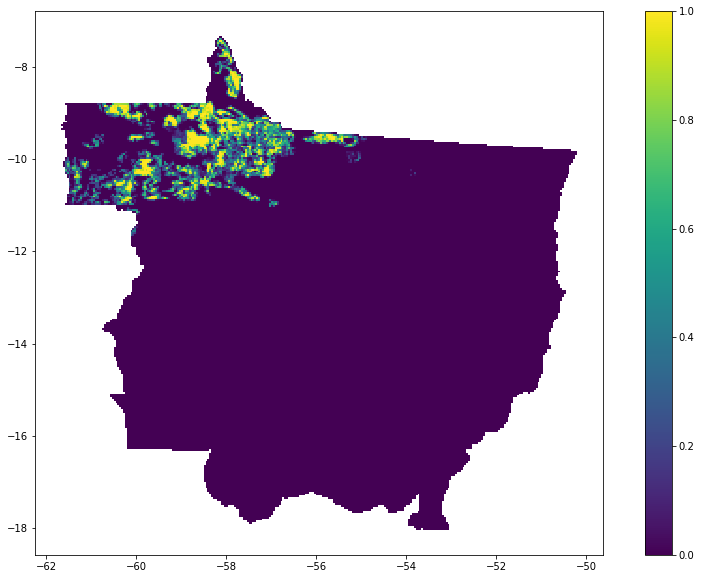

time: 10.5 s (started: 2022-12-02 13:56:09 +00:00)


In [ ]:
grid.plot(column="PD_15",
    legend=True,
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"
    })

## Criação de grade do terraclimate: Vetor extrai de Raster e gera Vetor
- [x] Acessa a pasta no Google Drive e traz a lista de arquivos terraclimate
- [x] Para cada arquivo (mês) será criado um novo grid com as colunas com o nome de cada banda do terraclimate
- [x] O arquivo do Terraclimate será aberto e lido em cada banda. 15 vezes (15 bandas)
- [x] Para cada banda será extraído as informações do raster a partir do centróide da célula e será adicionado à coluna que possui o nome da banda no grid.
- [x] Após o fluxo de cada arquivo (mês) terraclimate será salvo um geodataframe no google drive.
- [x] Após o fluxo de cada arquivo (mês) terraclimate será saldo um csv no google drive

In [ ]:
import os

def get_terraclimate_tif_files(path):
  directory = path
  files = []
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if (os.path.isfile(f)) and ('.tif' in f):
      files.append(f)
      print(f)
  return files

time: 2.42 ms (started: 2022-12-02 12:30:47 +00:00)


In [ ]:
terraclimate_path = '/content/drive/MyDrive/terraclimate-mt'

time: 814 µs (started: 2022-12-01 20:27:52 +00:00)


In [ ]:
files = get_terraclimate_tif_files(terraclimate_path)

In [ ]:
print(len(files))

384
time: 1.35 ms (started: 2022-12-01 20:27:58 +00:00)


In [ ]:
files0_50 = files[0:50]
files50_100 = files[50:100]
files100_150 = files[100:150]
files150_200 = files[150:200]
files200_250 = files[200:250]
files250_300 = files[250:300]
files300_350 = files[300:350]
files350_385 = files[350:385]

time: 1.76 ms (started: 2022-12-01 20:28:00 +00:00)


In [ ]:
files0_50[:5]

['/content/drive/MyDrive/terraclimate-mt/198902.tif',
 '/content/drive/MyDrive/terraclimate-mt/198901.tif',
 '/content/drive/MyDrive/terraclimate-mt/198903.tif',
 '/content/drive/MyDrive/terraclimate-mt/198904.tif',
 '/content/drive/MyDrive/terraclimate-mt/198905.tif']

time: 4.45 ms (started: 2022-12-01 20:28:02 +00:00)


In [ ]:
def extract_raster_data_with_grid(grid, terraclimate_raster, terraclimate_data, column_name):
  for index, row in grid.iterrows():
    cell = row['id']

    # De acordo com determinada longitude e latitude, qual célula no raster?
    longitude = row['geometry'].centroid.x
    latitude= row['geometry'].centroid.y
    row_index, col_index = terraclimate_raster.index(longitude, latitude)

    grid[column_name].loc[index] = terraclimate_data[row_index, col_index]
  return grid

time: 1.73 ms (started: 2022-12-01 20:28:06 +00:00)


In [ ]:
def check_if_folder_exist(file_path):
  import os.path
  from os import path

  if path.exists(file_path) == False:
    os.mkdir(file_path)
    os.mkdir(file_path + '/shp/')
    os.mkdir(file_path + '/csv/')


time: 1.17 ms (started: 2022-12-05 18:02:29 +00:00)


Função que efetivamente cria a grade

In [ ]:
#  for terraclimate_file in files350_385:
#   default_grid = gpd.read_file(grid_path)
#   grid = default_grid
#   print(terraclimate_file)
#   terraclimate_raster = rio.open(terraclimate_file)
#   filename = terraclimate_file[39:45]
#   print(filename)
#   band = 1
#   while band < 15:
#     key = band
#     column_name = terraclimate_dict[key]
#     print(column_name)
#     grid[column_name] = 0
#     terraclimate_data = terraclimate_raster.read(band)
#     grid = extract_raster_data_with_grid(grid, terraclimate_raster, terraclimate_data, column_name)
#     band+=1
#   drive_folder = '/content/drive/MyDrive/terraclimate-fito-biomass-mt/' + filename[0:4]
#   print(drive_folder)
#   print(drive_folder +'shp/' + filename + '.shp')
#   check_if_folder_exist(drive_folder)
#   grid.to_file(drive_folder +'/shp/' + filename + '.shp')
#   print("Arquivo shp salvo" + filename)
#   grid.to_csv(drive_folder + '/csv/' + filename + '.csv')
#   print("Arquivo csv salvo" + '/csv/' + filename)


time: 578 µs (started: 2022-12-01 20:28:14 +00:00)


## Atualização das grades do terraclimate

In [ ]:
grid_for_update = pd.read_csv('/content/drive/MyDrive/terraclimate-fito-mt/1989/csv/198901.csv')

time: 850 ms (started: 2022-12-02 15:28:37 +00:00)


In [ ]:
columns_for_delete = ['B0_1','B0_2','B0_3','B0_4','B0_5','B0_6','B0_7','B0_8','B0_9','B0_10','B0_11','B0_12','B0_13','B0_14','B0_15','B0_16','B0_17','B0_18','B0_19','B0_20','B0_21','B0_22','B0_23','B0_24','B0_25','B0_26','B0_27','B0_28','B0_29','B0_30','B0_31','B0_32','B0_33','B0_34']

time: 1.5 ms (started: 2022-12-01 20:27:17 +00:00)


In [ ]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=['A','B','C'], columns=['A', 'B', 'C'])

time: 7.47 ms (started: 2022-12-02 15:44:51 +00:00)


In [ ]:
df

,A,B,C
A,0,2,3
B,0,4,1
C,10,20,30


time: 11 ms (started: 2022-12-02 15:44:57 +00:00)


In [ ]:
grid_for_update.drop(columns=columns_for_delete)

,Unnamed: 0,id,col,row,geometry,aet,def,pdsi,pet,pr,ro,soil,srad,swe,tmmn,tmmx,vap,vpd,vs
0,0,C189L00,189,0,"POLYGON ((-53.79152616 -18.04162, -53.79152616...",0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,C190L00,190,0,"POLYGON ((-53.7498596 -18.04162, -53.7498596 -...",1110,0,-172,1110,362,251,911,1900,0,190,293,2551,60,202
2,2,C191L00,191,0,"POLYGON ((-53.70819304 -18.04162, -53.70819304...",1110,0,-177,1110,360,249,896,1906,0,190,293,2551,60,203
3,3,C193L00,193,0,"POLYGON ((-53.62485992 -18.04162, -53.62485992...",1104,0,-189,1104,358,248,866,1898,0,188,291,2532,59,203
4,4,C194L00,194,0,"POLYGON ((-53.583193359999996 -18.04162, -53.5...",1106,0,-192,1106,357,246,851,1896,0,190,292,2548,60,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44023,44023,C84L255,84,255,"POLYGON ((-58.16651496 -7.416647200000002, -58...",883,0,220,883,351,262,2838,1432,0,218,303,2754,73,96
44024,44024,C85L255,85,255,"POLYGON ((-58.1248484 -7.416647200000002, -58....",886,0,220,886,349,260,2811,1440,0,218,303,2755,72,96
44025,44025,C86L255,86,255,"POLYGON ((-58.08318184 -7.416647200000002, -58...",888,0,213,888,348,259,2783,1442,0,218,303,2757,72,95
44026,44026,C84L256,84,256,"POLYGON ((-58.16651496 -7.374980640000002, -58...",888,0,225,888,350,261,2841,1442,0,218,303,2754,72,96


time: 39.7 ms (started: 2022-12-01 20:28:37 +00:00)


In [ ]:
grid_for_update.at[3,'col']

193

time: 8.1 ms (started: 2022-12-02 15:41:54 +00:00)


In [ ]:
grid_test = grid_for_update.set_index('id')

time: 23.3 ms (started: 2022-12-02 15:46:34 +00:00)


In [ ]:
grid_test.index

Index(['C189L00', 'C190L00', 'C191L00', 'C193L00', 'C194L00', 'C195L00',
       'C196L00', 'C197L00', 'C198L00', 'C199L00',
       ...
       'C84L254', 'C85L254', 'C86L254', 'C87L254', 'C83L255', 'C84L255',
       'C85L255', 'C86L255', 'C84L256', 'C85L256'],
      dtype='object', name='id', length=44028)

time: 24.4 ms (started: 2022-12-02 15:55:12 +00:00)


In [ ]:
def create_path_list_for_structure(directory):
  year_folders = []
  p_list = []
  for paths in os.listdir(directory):
    if 'GRD' not in paths:
      f = os.path.join(directory, paths)

      if (os.path.isdir(f)):
        year_folders.append(f)
  for dir in year_folders:
    dir = dir + '/csv'
    for files in os.listdir(dir):

      fil = os.path.join(dir, files)
      if (os.path.isfile(fil)) and ('.csv' in fil):
        p_list.append(fil)
  return year_folders, p_list

time: 4.13 ms (started: 2022-12-02 22:17:07 +00:00)


In [ ]:
folders_year, paths = create_path_list_for_structure('/content/drive/MyDrive/terraclimate-fito-mt')

time: 7.95 s (started: 2022-12-02 22:17:39 +00:00)


In [ ]:
folders_year

['/content/drive/MyDrive/terraclimate-fito-mt/1989',
 '/content/drive/MyDrive/terraclimate-fito-mt/1990',
 '/content/drive/MyDrive/terraclimate-fito-mt/1991',
 '/content/drive/MyDrive/terraclimate-fito-mt/1992',
 '/content/drive/MyDrive/terraclimate-fito-mt/1993',
 '/content/drive/MyDrive/terraclimate-fito-mt/1994',
 '/content/drive/MyDrive/terraclimate-fito-mt/1995',
 '/content/drive/MyDrive/terraclimate-fito-mt/1996',
 '/content/drive/MyDrive/terraclimate-fito-mt/1997',
 '/content/drive/MyDrive/terraclimate-fito-mt/1998',
 '/content/drive/MyDrive/terraclimate-fito-mt/1999',
 '/content/drive/MyDrive/terraclimate-fito-mt/2000',
 '/content/drive/MyDrive/terraclimate-fito-mt/2001',
 '/content/drive/MyDrive/terraclimate-fito-mt/2002',
 '/content/drive/MyDrive/terraclimate-fito-mt/2003',
 '/content/drive/MyDrive/terraclimate-fito-mt/2004',
 '/content/drive/MyDrive/terraclimate-fito-mt/2005',
 '/content/drive/MyDrive/terraclimate-fito-mt/2006',
 '/content/drive/MyDrive/terraclimate-fito-mt/

time: 8.37 ms (started: 2022-12-02 22:17:47 +00:00)


In [ ]:
keys = ['id', 'row', 'col']

time: 758 µs (started: 2022-12-01 20:28:54 +00:00)


In [ ]:
def merge_new_data_with_terraclimateGrid_and_delete_old_columns(path_list, grid):
  for path in path_list:
    terraclimatedata = pd.read_csv(path)
    terraclimateGrid = terraclimatedata.drop(columns=columns_for_delete)
    filename = path[53:59]
    print(filename)
    d = pd.merge(terraclimateGrid, grid,how='inner', on=keys)

    drive_folder = '/content/drive/MyDrive/terraclimate_forests/' + filename[0:4]
    print(drive_folder)
    check_if_folder_exist(drive_folder)
    d.to_csv(drive_folder + '/csv/' + filename + '.csv')
    print("Arquivo csv salvo" + '/csv/' + filename)

time: 2.17 ms (started: 2022-12-01 20:28:58 +00:00)


In [ ]:
merge_new_data_with_terraclimateGrid_and_delete_old_columns(paths, grid)

In [ ]:
test3 = pd.read_csv('/content/drive/MyDrive/terraclimate-fito-biomass-mt/2012/csv/201208.csv')

time: 1.74 s (started: 2022-12-01 20:29:00 +00:00)


In [ ]:
paths[1:5]

['/content/drive/MyDrive/terraclimate-fito-mt/1989/csv/198901.csv',
 '/content/drive/MyDrive/terraclimate-fito-mt/1989/csv/198903.csv',
 '/content/drive/MyDrive/terraclimate-fito-mt/1989/csv/198904.csv',
 '/content/drive/MyDrive/terraclimate-fito-mt/1989/csv/198905.csv']

time: 5.05 ms (started: 2022-12-01 20:29:02 +00:00)


Conversão dos arquivos csv para geodataframe

In [ ]:
from shapely import wkt

def get_dataframe_convert_and_create_geodataframe(path_list):
  for path in path_list:
    filename = path[61:67]
    dataframe = pd.read_csv(path)
    dataframe['geometry'] = dataframe['geometry_y'].apply(wkt.loads)
    crs = 'EPSG:4674'

    geodataframe = gpd.GeoDataFrame(dataframe, crs = crs)
    geodataframe.set_geometry(col='geometry', inplace=True)

    drive_folder = '/content/drive/MyDrive/terraclimate_forests/' + filename[0:4]
    print(drive_folder)
    check_if_folder_exist(drive_folder)
    geodataframe.to_file(drive_folder + '/shp/' + filename + '.shp')
    print("Arquivo shapefile salvo em " + drive_folder + '/shp/' + filename)


time: 2.85 ms (started: 2022-12-01 20:29:08 +00:00)


In [ ]:
# get_dataframe_convert_and_create_geodataframe(paths)

# Criação dos dados anuais do Terraclimate a partir de sua grade

In [ ]:
terraclimate_dict = {
    'aet': 'evapotranspiration',
    'def': 'water_defict',
    "pet": 'ref_evapot',
    "pr": 'precipitation',
    "tmmn": 'temp_min',
    'tmmx': 'temp_max',
    'vap': 'vapor_pressure',
    'vpd': 'def_vapor_press',
}

time: 1.16 ms (started: 2022-12-01 20:29:19 +00:00)


In [ ]:
columns_annual_data = ['id', 'col', 'row', 'IB_1', 'IB_2', 'IB_3', 'IB_4', 'IB_5', 'IB_6',
       'IB_7', 'IB_8', 'IB_9', 'IB_10', 'IB_11', 'IB_12', 'IB_13', 'IB_14',
       'IB_15', 'IB_16', 'IB_17', 'IB_18', 'IB_19', 'IB_20', 'IB_21', 'FA_1',
       'FA_2', 'FA_3', 'FA_4', 'FA_5', 'FA_6', 'FA_7', 'FA_8', 'FA_9', 'FA_10',
       'FA_11', 'FA_12', 'FA_13', 'FA_14', 'FA_15', 'FA_16', 'FA_17', 'FA_18',
       'FA_19', 'FA_20', 'FA_21', 'PD_1', 'PD_2', 'PD_3', 'PD_4', 'PD_5',
       'PD_6', 'PD_7', 'PD_8', 'PD_9', 'PD_10', 'PD_11', 'PD_12', 'PD_13',
       'PD_14', 'PD_15', 'PD_16', 'PD_17', 'PD_18', 'PD_19', 'PD_20', 'PD_21',
       'geometry', 'evapotranspiracao', 'water_deficit', 'ref_evapot', 'precipitacao', 'temp_min', 'temp_max', 'vapor_pressure', 'def_vapor_press', 'carbon_Min', 'carbon_Max',
       'carbon_Mean', 'carbon_Median', 'carbon_Mode']

time: 1.76 ms (started: 2022-12-01 20:29:22 +00:00)


In [ ]:
import os
def get_files_from_path(year_path):
  p_list = []
  dir = year_path + '/csv'
  for files in os.listdir(dir):

    fil = os.path.join(dir, files)
    if (os.path.isfile(fil)) and ('.csv' in fil):
      p_list.append(fil)
  return p_list

time: 2.02 ms (started: 2022-12-02 21:57:24 +00:00)


In [ ]:
year_folder[0]
files_list = get_files_from_path(year_folder[0])

NameError: ignored

time: 130 ms (started: 2022-12-06 22:45:09 +00:00)


#### Cria o arquivo anual de cada dado com dados médios, minimos e maximos

In [ ]:
files_list[0][53:59]

'198902'

time: 4.53 ms (started: 2022-12-01 23:25:36 +00:00)


In [ ]:
def create_dict_of_mensal_dataframes(files_list):
  d = {}
  for files in files_list:
    df_month = pd.read_csv(files)
    d[files[53:59]] = df_month
  return d

time: 884 µs (started: 2022-12-01 23:27:11 +00:00)


In [ ]:
def create_anuual_dataframe(year_folder):
  filename = "ano"
  p_list = []
  for folder in year_folder:
    dataframe = pd.DataFrame(columns=columns_annual_data)
    files_list = get_files_from_path(folder)
    dict_month = create_dict_of_mensal_dataframes(files_list)
  return dict_month


time: 1.36 ms (started: 2022-12-01 23:34:44 +00:00)


In [ ]:
dict_month = create_dict_of_mensal_dataframes(files_list)

time: 9.35 s (started: 2022-12-01 23:36:58 +00:00)


In [ ]:
dict_month.values()

In [ ]:
for index, col in l.iterrows():
  # if (col not in ['id', 'row', 'col', 'geometry']) and ('B0' not in col):
    # print(col, 'coluna')
    print(index, 'id')

In [ ]:
keys=['Unnamed: 0', 'id', 'col', 'row', 'B0_1', 'B0_2', 'B0_3', 'B0_4',
       'B0_5', 'B0_6', 'B0_7', 'B0_8', 'B0_9', 'B0_10', 'B0_11', 'B0_12',
       'B0_13', 'B0_14', 'B0_15', 'B0_16', 'B0_17', 'B0_18', 'B0_19', 'B0_20',
       'B0_21', 'B0_22', 'B0_23', 'B0_24', 'B0_25', 'B0_26', 'B0_27', 'B0_28',
       'B0_29', 'B0_30', 'B0_31', 'B0_32', 'B0_33', 'B0_34', 'geometry']

time: 1.45 ms (started: 2022-12-01 21:52:31 +00:00)


In [ ]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=keys,
                                            how='inner'), dict_month.values())

<ipython-input-82-eeb5d59db5e4>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'pr_x', 'soil_x', 'srad_x', 'tmmn_x', 'tmmx_x', 'pdsi_x', 'def_x', 'vap_x', 'vs_x', 'pet_x', 'swe_x', 'aet_x', 'vpd_x', 'ro_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = reduce(lambda  left,right: pd.merge(left,right,on=keys,


time: 6.99 s (started: 2022-12-01 23:37:55 +00:00)


In [ ]:
def generate_columns_names(month):
  tmmn = 'tmmn' + month
  tmmx = 'tmmx' + month
  pr = 'pr' + month
  aet = 'aet' + month
  def_ = 'def' + month

  list_columns_name = [tmmn, tmmx, pr, aet, def_]
  return list_columns_name

time: 1.36 ms (started: 2022-12-02 21:54:35 +00:00)


In [ ]:
def create_column_name(dataframe, list_of_columns):
  df = dataframe
  for column in list_of_columns:
    df[column] = 0
  return df

time: 997 µs (started: 2022-12-02 21:54:37 +00:00)


In [ ]:
def get_col_name(column,month):

  if column in 'tmmn':
    return 'tmmn' + month
  elif column in 'tmmx':
    return 'tmmx' + month
  elif column in 'pr':
    return 'pr' + month
  elif column in 'aet':
    return 'aet' + month
  elif column in 'def':
    return 'def' + month


time: 1.41 ms (started: 2022-12-02 21:54:39 +00:00)


In [ ]:
def get_values_and_return_df_year_updated(df_year,df_month, month):
  updated_df_year = df_year
  if updated_df_year['col'].empty:
    updated_df_year['id'] = df_month['id']
    updated_df_year['col'] = df_month['col']
    updated_df_year['row'] = df_month['row']
    updated_df_year['geometry'] = df_month['geometry']
    updated_df_year = updated_df_year.set_index('id')
    print(2)

  df_month = df_month.set_index('id')
  for col in df_month:
    if col in ['tmmx','tmmn','def', 'pr', 'aet']:
      for index in df_month.index:
        col_month = get_col_name(col,month)
        updated_df_year.at[index,col_month] = df_month.at[index,col]

  return updated_df_year

time: 8.69 ms (started: 2022-12-02 22:02:19 +00:00)


In [ ]:
a = '/content/drive/MyDrive/terraclimate-fito-mt/1999/csv/199905.csv'
a[44:48]

'1999'

time: 10.9 ms (started: 2022-12-06 22:45:14 +00:00)


In [ ]:
eita = pd.read_csv(a)
eita['tmmn'].mean()

172.07640592350322

time: 2.06 s (started: 2022-12-06 22:45:18 +00:00)


In [ ]:
folders_year

['/content/drive/MyDrive/terraclimate-fito-mt/1989',
 '/content/drive/MyDrive/terraclimate-fito-mt/1990',
 '/content/drive/MyDrive/terraclimate-fito-mt/1991',
 '/content/drive/MyDrive/terraclimate-fito-mt/1992',
 '/content/drive/MyDrive/terraclimate-fito-mt/1993',
 '/content/drive/MyDrive/terraclimate-fito-mt/1994',
 '/content/drive/MyDrive/terraclimate-fito-mt/1995',
 '/content/drive/MyDrive/terraclimate-fito-mt/1996',
 '/content/drive/MyDrive/terraclimate-fito-mt/1997',
 '/content/drive/MyDrive/terraclimate-fito-mt/1998',
 '/content/drive/MyDrive/terraclimate-fito-mt/1999',
 '/content/drive/MyDrive/terraclimate-fito-mt/2000',
 '/content/drive/MyDrive/terraclimate-fito-mt/2001',
 '/content/drive/MyDrive/terraclimate-fito-mt/2002',
 '/content/drive/MyDrive/terraclimate-fito-mt/2003',
 '/content/drive/MyDrive/terraclimate-fito-mt/2004',
 '/content/drive/MyDrive/terraclimate-fito-mt/2005',
 '/content/drive/MyDrive/terraclimate-fito-mt/2006',
 '/content/drive/MyDrive/terraclimate-fito-mt/

time: 6.45 ms (started: 2022-12-02 22:18:13 +00:00)


In [ ]:
for year_folder in folders_year:
  # year_folder = '/content/drive/MyDrive/terraclimate-fito-mt/1989'
  filename = year_folder[44:48]
  df_year = pd.DataFrame(columns=['id','col','row','geometry'])
  months_paths = get_files_from_path(year_folder)
  for month_file in months_paths:
    month = month_file[57:59]
    print(month)
    df_month = pd.read_csv(month_file)

    columns_list = generate_columns_names(month)
    df_year_ = create_column_name(df_year, columns_list)
    df_year = get_values_and_return_df_year_updated(df_year,df_month, month)

  print(df_year)
  drive_folder = '/content/drive/MyDrive/terraclimate-years/year-data/csv/' + filename + '.csv'
  df_year.to_csv(drive_folder)
  print("Arquivo salvo em " + drive_folder)


02
2
01
03
04
05
06
07
08
09
10
11
12
         col  row                                           geometry  tmmn02  \
id                                                                             
C189L00  189    0  POLYGON ((-53.79152616 -18.04162, -53.79152616...     0.0   
C190L00  190    0  POLYGON ((-53.7498596 -18.04162, -53.7498596 -...   191.0   
C191L00  191    0  POLYGON ((-53.70819304 -18.04162, -53.70819304...   191.0   
C193L00  193    0  POLYGON ((-53.62485992 -18.04162, -53.62485992...   189.0   
C194L00  194    0  POLYGON ((-53.583193359999996 -18.04162, -53.5...   190.0   
...      ...  ...                                                ...     ...   
C84L255   84  255  POLYGON ((-58.16651496 -7.416647200000002, -58...   213.0   
C85L255   85  255  POLYGON ((-58.1248484 -7.416647200000002, -58....   212.0   
C86L255   86  255  POLYGON ((-58.08318184 -7.416647200000002, -58...   212.0   
C84L256   84  256  POLYGON ((-58.16651496 -7.374980640000002, -58...   212.0   
C8

In [ ]:
t = pd.read_csv('/content/drive/MyDrive/terraclimate-years/year-data/csv/1989.csv')
t.head(60)

,id,col,row,geometry,tmmn02,tmmx02,pr02,aet02,def02,tmmn01,...,tmmn11,tmmx11,pr11,aet11,def11,tmmn12,tmmx12,pr12,aet12,def12
0,C189L00,189,0,"POLYGON ((-53.79152616 -18.04162, -53.79152616...",0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,C190L00,190,0,"POLYGON ((-53.7498596 -18.04162, -53.7498596 -...",191.0,299.0,262.0,930.0,0.0,190,...,204,309,193,1247,0,194,306,270,1018,0
2,C191L00,191,0,"POLYGON ((-53.70819304 -18.04162, -53.70819304...",191.0,299.0,262.0,930.0,0.0,190,...,203,308,192,1247,0,194,306,272,1021,0
3,C193L00,193,0,"POLYGON ((-53.62485992 -18.04162, -53.62485992...",189.0,298.0,266.0,923.0,0.0,188,...,201,307,193,1242,0,193,304,281,1003,0
4,C194L00,194,0,"POLYGON ((-53.583193359999996 -18.04162, -53.5...",190.0,298.0,266.0,922.0,0.0,190,...,203,308,191,1244,0,193,305,286,1004,0
5,C195L00,195,0,"POLYGON ((-53.5415268 -18.04162, -53.5415268 -...",188.0,296.0,268.0,917.0,0.0,187,...,201,306,191,1239,0,191,303,288,1001,0
6,C196L00,196,0,"POLYGON ((-53.49986024 -18.04162, -53.49986024...",187.0,295.0,270.0,915.0,0.0,186,...,199,305,192,1239,0,190,301,293,993,0
7,C197L00,197,0,"POLYGON ((-53.45819368 -18.04162, -53.45819368...",185.0,294.0,270.0,909.0,0.0,185,...,198,303,191,1234,0,189,300,295,996,0
8,C198L00,198,0,"POLYGON ((-53.41652712 -18.04162, -53.41652712...",183.0,292.0,271.0,905.0,0.0,183,...,195,302,191,1229,0,186,297,298,988,0
9,C199L00,199,0,"POLYGON ((-53.37486056 -18.04162, -53.37486056...",175.0,284.0,277.0,886.0,0.0,175,...,188,295,194,1210,0,179,290,303,964,0


time: 1.43 s (started: 2022-12-05 18:51:30 +00:00)


#Criação das métricas dos dados do Terraclimate

In [ ]:
def get_columns_list_statistics():
  tmmn = ['tmmn01','tmmn02','tmmn03','tmmn04','tmmn05','tmmn06','tmmn07','tmmn08','tmmn09','tmmn10','tmmn11','tmmn12']
  tmmx = ['tmmx01','tmmx02','tmmx03','tmmx04','tmmx05','tmmx06','tmmx07','tmmx08','tmmx09','tmmx10','tmmx11','tmmx12']
  def_ = ['def01','def02','def03','def04','def05','def06','def07','def08','def09','def10','def11','def12']
  aet = ['aet01','aet02','aet03','aet04','aet05','aet06','aet07','aet08','aet09','aet10','aet11','aet12']
  pr = ['pr01','pr02','pr03','pr04','pr05','pr06','pr07','pr08','pr09','pr10','pr11','pr12']

  return tmmn, tmmx, def_, aet, pr

time: 2.75 ms (started: 2022-12-02 22:48:30 +00:00)


In [ ]:
fd_year = get_files_from_path('/content/drive/MyDrive/terraclimate-years/year-data')
fd_year[1:6]

NameError: ignored

time: 20.3 ms (started: 2022-12-05 18:52:14 +00:00)


In [ ]:
def get_annual_df_and_create_statistics_df(folders_year):
  for year_path in folders_year:
    df_stat = pd.DataFrame(columns=['id','row','col','geometry','tmmn','tmmx','def','aet','pr'])
  # year_path = '/content/drive/MyDrive/terraclimate-years/year-data/csv/1989.csv'
    filename = year_path[56:60]
    df_year = pd.read_csv(year_path)
    df_stat['id'] = df_year['id']
    df_stat['row'] = df_year['row']
    df_stat['col'] = df_year['col']
    df_stat['geometry'] = df_year['geometry']
    df_stat = df_stat.set_index('id')
    df_year = df_year.set_index('id')
    tmmn, tmmx,def_,aet,pr = get_columns_list_statistics()
    for index in df_year.index:
      tmn = 0
      tmx = 0
      de = 0
      ae = 0
      p = 0
      for col_tmmn in tmmn:
        tmn += df_year.at[index,col_tmmn]
      df_stat.at[index,'tmmn'] = tmn/12
      for col_tmmx in tmmx:
        tmx += df_year.at[index,col_tmmx]
      df_stat.at[index,'tmmx'] = tmx/12
      for col_def in def_:
        de += df_year.at[index,col_def]
      df_stat.at[index,'def'] = de/12
      for col_aet in aet:
        ae += df_year.at[index,col_aet]
      df_stat.at[index,'aet'] = ae/12
      for col_pr in pr:
        p += df_year.at[index,col_pr]
      df_stat.at[index,'pr'] = p/12

    drive_folder = '/content/drive/MyDrive/terraclimate-years/year-mean-data/csv/' + filename + '.csv'
    df_stat.to_csv(drive_folder)
  return 'ok'

time: 5.45 ms (started: 2022-12-03 00:46:37 +00:00)


In [ ]:
get_annual_df_and_create_statistics_df(fd_year)

'ok'

time: 7min 48s (started: 2022-12-02 23:39:50 +00:00)


In [ ]:
teste4 = pd.read_csv('/content/drive/MyDrive/terraclimate-years/year-mean-data/csv/2000.csv')
teste4.head(10)

,id,row,col,geometry,tmmn,tmmx,def,aet,pr
0,C189L00,0,189,"POLYGON ((-53.79152616 -18.04162, -53.79152616...",0.000000,0.000000,0.000000,0.000000,0.000000
1,C190L00,0,190,"POLYGON ((-53.7498596 -18.04162, -53.7498596 -...",179.166667,304.166667,253.416667,851.916667,124.250000
2,C191L00,0,191,"POLYGON ((-53.70819304 -18.04162, -53.70819304...",179.000000,303.916667,254.666667,850.333333,124.666667
3,C193L00,0,193,"POLYGON ((-53.62485992 -18.04162, -53.62485992...",177.500000,302.500000,255.000000,844.666667,126.916667
4,C194L00,0,194,"POLYGON ((-53.583193359999996 -18.04162, -53.5...",178.666667,303.416667,260.583333,840.250000,127.083333
5,C195L00,0,195,"POLYGON ((-53.5415268 -18.04162, -53.5415268 -...",176.333333,301.250000,259.583333,837.666667,128.166667
6,C196L00,0,196,"POLYGON ((-53.49986024 -18.04162, -53.49986024...",175.416667,300.416667,259.333333,836.166667,129.416667
7,C197L00,0,197,"POLYGON ((-53.45819368 -18.04162, -53.45819368...",173.750000,298.750000,258.166667,835.166667,130.000000
8,C198L00,0,198,"POLYGON ((-53.41652712 -18.04162, -53.41652712...",171.750000,296.916667,256.833333,832.500000,131.000000
9,C199L00,0,199,"POLYGON ((-53.37486056 -18.04162, -53.37486056...",164.583333,289.666667,248.250000,828.583333,133.750000


time: 306 ms (started: 2022-12-03 00:34:05 +00:00)


##Exportações de Imagens dos dados anuais

In [ ]:
import os

def get_list_csv_files(path):
  directory = path
  files = []
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if (os.path.isfile(f)) and ('.csv' in f):
      files.append(f)
  return files

time: 1.54 ms (started: 2022-12-06 22:46:06 +00:00)


In [ ]:
from shapely import wkt
def get_annual_dataframe_convert_and_create_geodataframe(path_list):
  for path in path_list:
    filename = path[61:65]
    dataframe = pd.read_csv(path)
    print(dataframe.columns)
    dataframe['geometry'] = dataframe['geometry'].apply(wkt.loads)
    crs = 'EPSG:4674'

    geodataframe = gpd.GeoDataFrame(dataframe, crs = crs)
    geodataframe.set_geometry(col='geometry', inplace=True)

    drive_folder = '/content/drive/MyDrive/terraclimate-years/year-mean-data/shp/' + filename + '.shp'
    print(drive_folder)
    geodataframe.to_file(drive_folder)
    print("Arquivo shapefile salvo em " + drive_folder)

time: 3.83 ms (started: 2022-12-05 18:04:27 +00:00)


In [ ]:
from shapely import wkt
def get_annual_dataframe_convert_and_create_geodataframe(path_list):
  for path in path_list:
    filename = path[61:65]
    dataframe = pd.read_csv(path)
    dataframe['tmmn'] = dataframe['tmmn']*0.1
    dataframe['tmmx'] = dataframe['tmmx']*0.1
    dataframe['def'] = dataframe['def']*0.1
    dataframe['aet'] = dataframe['aet']*0.1
    dataframe['geometry'] = dataframe['geometry'].apply(wkt.loads)
    crs = 'EPSG:4674'

    geodataframe = gpd.GeoDataFrame(dataframe, crs = crs)
    geodataframe.set_geometry(col='geometry', inplace=True)

    drive_folder = '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/' + filename + '.shp'
    print(drive_folder)
    geodataframe.to_file(drive_folder)
    print("Arquivo shapefile salvo em " + drive_folder)

time: 7.41 ms (started: 2022-12-05 19:46:44 +00:00)


In [ ]:
annual_data = get_list_csv_files('/content/drive/MyDrive/terraclimate-years/year-mean-data/csv')
annual_data[0:5]

NameError: ignored

time: 266 ms (started: 2022-12-06 23:29:52 +00:00)


In [ ]:
get_annual_dataframe_convert_and_create_geodataframe(annual_data)

/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1989.shp
Arquivo shapefile salvo em /content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1989.shp
/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1990.shp
Arquivo shapefile salvo em /content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1990.shp
/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1991.shp
Arquivo shapefile salvo em /content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1991.shp
/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1992.shp
Arquivo shapefile salvo em /content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1992.shp
/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1993.shp
Arquivo shapefile salvo em /content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1993

In [ ]:
annual_data[0][61:65]

'1989'

time: 8.46 ms (started: 2022-12-05 17:53:53 +00:00)


In [ ]:
teste = pd.read_csv(annual_data[0])
teste

,id,row,col,geometry,tmmn,tmmx,def,aet,pr
0,C189L00,0,189,"POLYGON ((-53.79152616 -18.04162, -53.79152616...",0.000000,0.000000,0.000000,0.000000,0.000000
1,C190L00,0,190,"POLYGON ((-53.7498596 -18.04162, -53.7498596 -...",172.166667,297.166667,147.666667,931.416667,148.500000
2,C191L00,0,191,"POLYGON ((-53.70819304 -18.04162, -53.70819304...",172.000000,296.916667,148.750000,931.083333,148.333333
3,C193L00,0,193,"POLYGON ((-53.62485992 -18.04162, -53.62485992...",170.750000,295.750000,147.583333,928.750000,149.583333
4,C194L00,0,194,"POLYGON ((-53.583193359999996 -18.04162, -53.5...",171.916667,296.666667,152.500000,925.500000,149.333333
...,...,...,...,...,...,...,...,...,...
44023,C84L255,255,84,"POLYGON ((-58.16651496 -7.416647200000002, -58...",208.833333,316.416667,82.583333,821.250000,191.750000
44024,C85L255,255,85,"POLYGON ((-58.1248484 -7.416647200000002, -58....",208.750000,316.666667,83.500000,822.833333,192.000000
44025,C86L255,255,86,"POLYGON ((-58.08318184 -7.416647200000002, -58...",208.750000,316.833333,83.000000,821.416667,193.000000
44026,C84L256,256,84,"POLYGON ((-58.16651496 -7.374980640000002, -58...",209.083333,316.416667,82.166667,823.500000,190.250000


time: 260 ms (started: 2022-12-05 17:51:12 +00:00)


In [ ]:
terraclimate_shps = get_list_shp_files('/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp')
terraclimate_shps[0:5]

['/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1989.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1990.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1991.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1992.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1993.shp']

time: 27.5 ms (started: 2022-12-18 16:22:28 +00:00)


In [ ]:
# Read in vector
vector = gpd.read_file(terraclimate_shps[24])

# Get list of geometries for all features in vector file
geom = [shapes for shapes in vector.geometry]

time: 3.97 s (started: 2022-12-07 01:00:23 +00:00)


In [ ]:
pip install geocube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.84 s (started: 2022-12-07 01:00:14 +00:00)


In [ ]:
from geocube.api.core import make_geocube

time: 2.74 s (started: 2022-12-07 00:59:16 +00:00)


In [ ]:
for path in terraclimate_shps:
  filename = path[78:82]
  vector = gpd.read_file(path)
  cube = make_geocube(vector_data=vector, resolution=(-0.0040, 0.0040),measurements=['tmmn'],fill=0)
  drive_folder = '/content/drive/MyDrive/terraclimate-raster-mean/tmmn/' + filename + '.tiff'
  cube.rio.to_raster(drive_folder)

time: 8min 38s (started: 2022-12-07 02:04:01 +00:00)


In [ ]:
for path in terraclimate_shps:
  filename = path[78:82]
  vector = gpd.read_file(path)
  cube = make_geocube(vector_data=vector, resolution=(-0.0040, 0.0040),measurements=['tmmx'],fill=0)
  drive_folder = '/content/drive/MyDrive/terraclimate-raster-mean/tmmx/' + filename + '.tiff'
  cube.rio.to_raster(drive_folder)

time: 8min 29s (started: 2022-12-07 02:12:39 +00:00)


In [ ]:
for path in terraclimate_shps:
  filename = path[78:82]
  vector = gpd.read_file(path)
  cube = make_geocube(vector_data=vector, resolution=(-0.0040, 0.0040),measurements=['pr'],fill=0)
  drive_folder = '/content/drive/MyDrive/terraclimate-raster-mean/pr/' + filename + '.tiff'
  cube.rio.to_raster(drive_folder)

time: 8min 25s (started: 2022-12-07 02:21:09 +00:00)


In [ ]:
for path in terraclimate_shps:
  filename = path[78:82]
  vector = gpd.read_file(path)
  cube = make_geocube(vector_data=vector, resolution=(-0.0040, 0.0040),measurements=['aet'],fill=0)
  drive_folder = '/content/drive/MyDrive/terraclimate-raster-mean/aet/' + filename + '.tiff'
  cube.rio.to_raster(drive_folder)

time: 8min 2s (started: 2022-12-07 02:29:34 +00:00)


In [ ]:
for path in terraclimate_shps:
  filename = path[78:82]
  vector = gpd.read_file(path)
  cube = make_geocube(vector_data=vector, resolution=(-0.0040, 0.0040),measurements=['def'],fill=0)
  drive_folder = '/content/drive/MyDrive/terraclimate-raster-mean/def/' + filename + '.tiff'
  cube.rio.to_raster(drive_folder)

In [ ]:
cube = make_geocube(vector_data=vector, resolution=(-0.0040, 0.0040),measurements=['tmmn'],fill=0)

time: 35.7 s (started: 2022-12-07 01:01:09 +00:00)


In [ ]:
cube

<xarray.Dataset>
Dimensions:      (y: 2678, x: 2865)
Coordinates:
  * y            (y) float64 -7.334 -7.338 -7.342 ... -18.03 -18.04 -18.04
  * x            (x) float64 -61.67 -61.66 -61.66 ... -50.22 -50.21 -50.21
    spatial_ref  int64 0
Data variables:
    row          (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    col          (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    tmmn         (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    tmmx         (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    def          (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    aet          (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pr           (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan

time: 33.7 ms (started: 2022-12-07 01:01:44 +00:00)


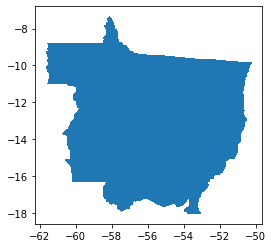

time: 14.9 s (started: 2022-12-07 01:03:23 +00:00)


In [ ]:
vector.plot(legend=True)

In [ ]:
cube.rio.to_raster('jesus.tiff')

time: 3.06 s (started: 2022-12-07 01:02:16 +00:00)


In [ ]:
from osgeo import gdal

# Define NoData value of new raster
NoData_value = -9999

# Filename of input OGR file
vector_fn = terraclimate_shps[24]

# Filename of the raster Tiff that will be created
raster_fn = '/content/drive/MyDrive/terraclimate-mt/198901.tif'

# Open the data source and read in the extent
source_ds = gdal.OpenEx(vector_fn)
pixel_size = 0.40  # about 25 metres(ish) use 0.001 if you want roughly 100m

ras = gdal.Rasterize(raster_fn, source_ds, format='GTIFF', outputType=gdal.GDT_Byte, creationOptions=["COMPRESS=DEFLATE"], noData=NoData_value, initValues=NoData_value, xRes=pixel_size, yRes=-pixel_size, allTouched=True, burnValues=1)

time: 540 ms (started: 2022-12-06 23:31:46 +00:00)


In [ ]:
cube = make_geocube(vector_data=vector, resolution=(-0.0040, 0.0040),measurements=['tmmn'],fill=0)

time: 10.9 s (started: 2022-12-07 01:12:24 +00:00)


In [ ]:
cube

<xarray.Dataset>
Dimensions:      (y: 2678, x: 2865)
Coordinates:
  * y            (y) float64 -7.334 -7.338 -7.342 ... -18.03 -18.04 -18.04
  * x            (x) float64 -61.67 -61.66 -61.66 ... -50.22 -50.21 -50.21
    spatial_ref  int64 0
Data variables:
    tmmn         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

time: 24.6 ms (started: 2022-12-07 01:47:57 +00:00)


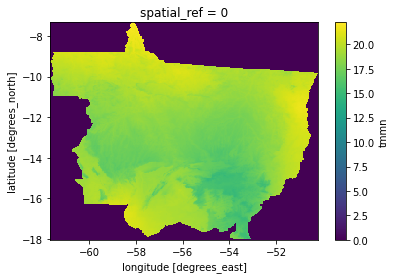

time: 7.2 s (started: 2022-12-07 01:47:50 +00:00)


In [ ]:
cube.tmmn.plot()

In [ ]:
import rasterio as rio

time: 718 µs (started: 2022-12-07 01:02:53 +00:00)


In [ ]:
rio.plot(ras)

AttributeError: ignored

time: 19.2 ms (started: 2022-12-07 01:02:50 +00:00)


In [ ]:
import matplotlib.pyplot as plt


time: 676 µs (started: 2022-12-05 20:14:43 +00:00)


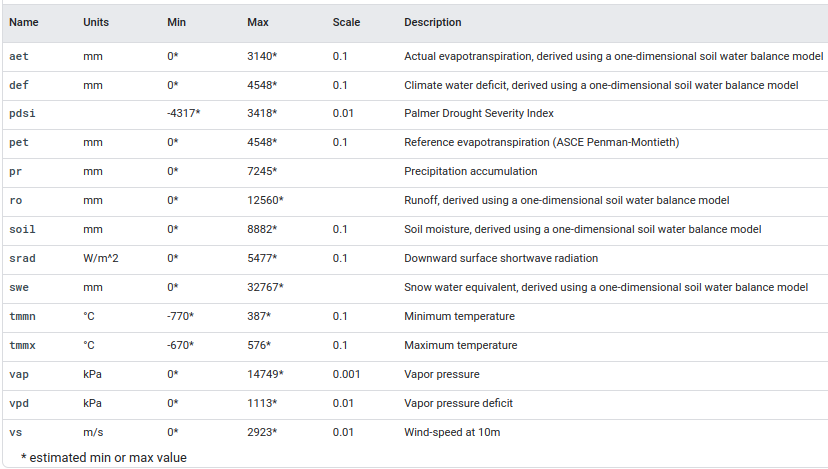

In [ ]:
# # Plot population estimates with an accurate legend
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 1)

# world.plot(column='pop_est',
#            ax=ax,
#            legend=True,
#            legend_kwds={'label': "Population by Country",
#                         'orientation': "horizontal"})

# Out[18]: <AxesSubplot: >

In [ ]:
a

,id,row,col,tmmn,tmmx,def,aet,pr,geometry
0,C189L00,0,189,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9..."
10,C200L00,0,200,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-53.33319 -18.04162, -53.33319 -17.9..."
57,C206L02,2,206,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-53.08319 -17.95829, -53.08319 -17.9..."
149,C110L06,6,110,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-57.08318 -17.79162, -57.08318 -17.7..."
221,C112L08,8,112,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-56.99985 -17.70829, -56.99985 -17.6..."
298,C113L10,10,113,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-56.95818 -17.62495, -56.95818 -17.5..."
368,C173L11,11,173,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-54.45819 -17.58329, -54.45819 -17.5..."
435,C168L12,12,168,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-54.66652 -17.54162, -54.66652 -17.4..."
447,C183L12,12,183,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-54.04153 -17.54162, -54.04153 -17.4..."
492,C146L13,13,146,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-55.58319 -17.49995, -55.58319 -17.4..."


time: 72.8 ms (started: 2022-12-05 20:17:27 +00:00)


In [ ]:
terraclimate_shps[0][78:82]

'1989'

time: 10.8 ms (started: 2022-12-05 22:37:30 +00:00)


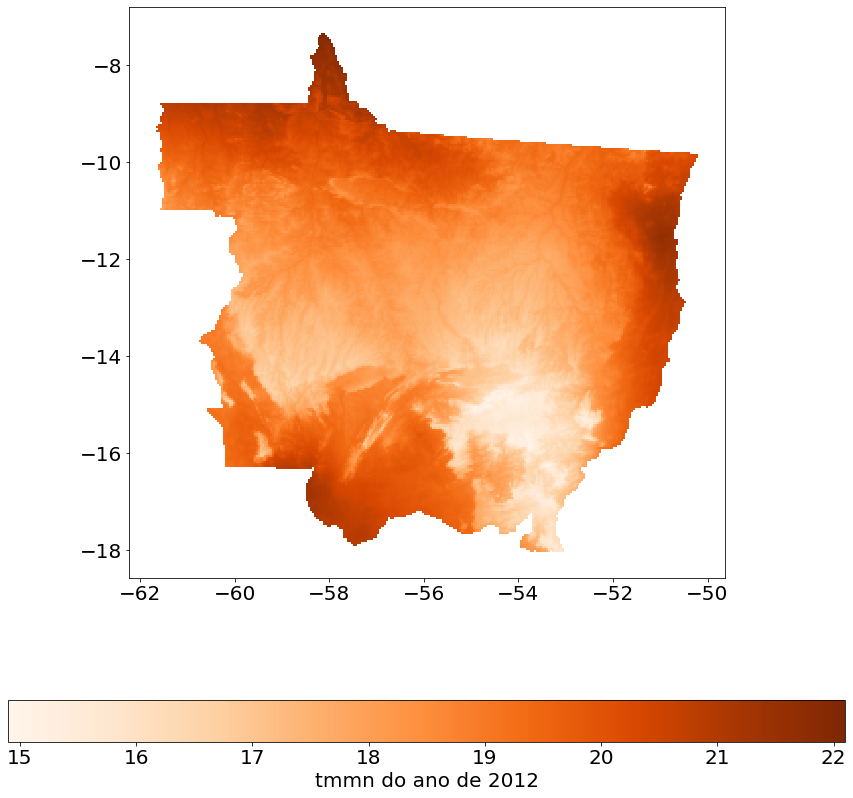

time: 18.8 s (started: 2022-12-05 23:24:17 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib

# fig, ax = plt.subplots(1, 1)
matplotlib.rcParams['font.size'] = 20

filename = terraclimate_shps[24][78:82]
terraclimate = gpd.read_file(terraclimate_shps[24])
terraclimate= terraclimate[terraclimate.tmmn != 0]
column = 'tmmn'
terraclimate.plot(column='tmmn',
  legend=True,
  figsize=(15, 15),
  cmap='Oranges',
  legend_kwds={'label': column + ' do ano de ' + filename,
               'orientation': "horizontal"})
image_name = '/content/drive/MyDrive/terraclimate-images/' + column + '/' + column + '_' + filename + '.tiff'
plt.savefig(image_name)

In [ ]:
print(terraclimate[terraclimate['tmmn'] == 0])

             id  row  col  tmmn  tmmx  def  aet   pr  \
0       C189L00    0  189   0.0   0.0  0.0  0.0  0.0   
10      C200L00    0  200   0.0   0.0  0.0  0.0  0.0   
57      C206L02    2  206   0.0   0.0  0.0  0.0  0.0   
149     C110L06    6  110   0.0   0.0  0.0  0.0  0.0   
221     C112L08    8  112   0.0   0.0  0.0  0.0  0.0   
298     C113L10   10  113   0.0   0.0  0.0  0.0  0.0   
368     C173L11   11  173   0.0   0.0  0.0  0.0  0.0   
435     C168L12   12  168   0.0   0.0  0.0  0.0  0.0   
447     C183L12   12  183   0.0   0.0  0.0  0.0  0.0   
492     C146L13   13  146   0.0   0.0  0.0  0.0  0.0   
531     C185L13   13  185   0.0   0.0  0.0  0.0  0.0   
617     C186L14   14  186   0.0   0.0  0.0  0.0  0.0   
928     C203L17   17  203   0.0   0.0  0.0  0.0  0.0   
1168    C204L19   19  204   0.0   0.0  0.0  0.0  0.0   
4001     C59L41   41   59   0.0   0.0  0.0  0.0  0.0   
4002     C60L41   41   60   0.0   0.0  0.0  0.0  0.0   
4895    C221L45   45  221   0.0   0.0  0.0  0.0 

# União dos dados do Terraclimate com os dados da quantidade de carbono por biomassa e classes.

In [ ]:
terraclimate_shps = get_list_shp_files('/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp')
terraclimate_shps[0:5]

['/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1989.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1990.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1991.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1992.shp',
 '/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/shp/1993.shp']

time: 1.13 s (started: 2022-12-28 11:29:15 +00:00)


In [ ]:
terraclimate_shps[0][78:82]

'1989'

time: 4.14 ms (started: 2022-12-28 11:29:18 +00:00)


In [ ]:
grid = gpd.read_file('/content/drive/MyDrive/terraclimate-fito-mt/GRD_Celular/GRD_MT_IBGE_floresta_mono2/GRD_MT_IBGE_floresta_mono2.shp')
grid.head(3)

,id,col,row,B0_1,geometry
0,C189L00,189,0,0.001472,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9..."
1,C190L00,190,0,0.007964,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9..."
2,C191L00,191,0,0.025320,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9..."


time: 4.36 s (started: 2022-12-28 11:30:46 +00:00)


In [ ]:
d = {}
for path in terraclimate_shps:
  d[path[78:82]] = gpd.read_file(path)

time: 1min 58s (started: 2022-12-28 11:32:21 +00:00)


In [ ]:
def rename_columns(terraclimate_dict):
  d_new = {}
  for key_name in terraclimate_dict.keys():
    df = terraclimate_dict[key_name]
    for col in df:
      if (col != 'id') and (col != 'row') and (col != 'col') :
        df = df.rename(columns={col: col + '_' + key_name})

    d_new[key_name] = df
  return d_new



time: 1.89 ms (started: 2022-12-28 11:34:20 +00:00)


In [ ]:
d_renamed = rename_columns(d)

time: 1.83 s (started: 2022-12-28 11:34:20 +00:00)


In [ ]:
d_renamed.keys()

dict_keys(['1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

time: 3.74 ms (started: 2022-12-28 11:34:21 +00:00)


In [ ]:
d_renamed['1989']

,id,row,col,tmmn_1989,tmmx_1989,def_1989,aet_1989,pr_1989,geometry_1989
0,C189L00,0,189,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9..."
1,C190L00,0,190,17.216667,29.716667,14.766667,93.141667,148.500000,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9..."
2,C191L00,0,191,17.200000,29.691667,14.875000,93.108333,148.333333,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9..."
3,C193L00,0,193,17.075000,29.575000,14.758333,92.875000,149.583333,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9..."
4,C194L00,0,194,17.191667,29.666667,15.250000,92.550000,149.333333,"POLYGON ((-53.58319 -18.04162, -53.58319 -17.9..."
...,...,...,...,...,...,...,...,...,...
44023,C84L255,255,84,20.883333,31.641667,8.258333,82.125000,191.750000,"POLYGON ((-58.16651 -7.41665, -58.16651 -7.374..."
44024,C85L255,255,85,20.875000,31.666667,8.350000,82.283333,192.000000,"POLYGON ((-58.12485 -7.41665, -58.12485 -7.374..."
44025,C86L255,255,86,20.875000,31.683333,8.300000,82.141667,193.000000,"POLYGON ((-58.08318 -7.41665, -58.08318 -7.374..."
44026,C84L256,256,84,20.908333,31.641667,8.216667,82.350000,190.250000,"POLYGON ((-58.16651 -7.37498, -58.16651 -7.333..."


time: 53.8 ms (started: 2022-12-28 11:34:21 +00:00)


In [ ]:
d.keys()

dict_keys(['1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

time: 13 ms (started: 2022-12-28 11:34:21 +00:00)


In [ ]:
from functools import reduce
df_big = reduce(lambda df1,df2: pd.merge(df1,df2,how='inner',on=['id','row','col']), d_renamed.values())

time: 9.34 s (started: 2022-12-28 11:34:22 +00:00)


In [ ]:
df_big

,id,row,col,tmmn_1989,tmmx_1989,def_1989,aet_1989,pr_1989,geometry_1989,tmmn_1990,...,def_2019,aet_2019,pr_2019,geometry_2019,tmmn_2020,tmmx_2020,def_2020,aet_2020,pr_2020,geometry_2020
0,C189L00,0,189,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9...",0.000000,...,0.000000,0.000000,0.000000,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9...",0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9..."
1,C190L00,0,190,17.216667,29.716667,14.766667,93.141667,148.500000,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9...",17.591667,...,36.975000,79.366667,84.333333,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9...",18.833333,31.333333,60.075000,64.983333,88.750000,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9..."
2,C191L00,0,191,17.200000,29.691667,14.875000,93.108333,148.333333,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9...",17.583333,...,36.308333,80.041667,85.583333,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9...",18.766667,31.258333,59.166667,65.541667,89.833333,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9..."
3,C193L00,0,193,17.075000,29.575000,14.758333,92.875000,149.583333,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9...",17.475000,...,35.416667,80.175000,89.250000,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9...",18.575000,31.075000,56.558333,67.158333,92.333333,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9..."
4,C194L00,0,194,17.191667,29.666667,15.250000,92.550000,149.333333,"POLYGON ((-53.58319 -18.04162, -53.58319 -17.9...",17.583333,...,35.591667,80.183333,90.250000,"POLYGON ((-53.58319 -18.04162, -53.58319 -17.9...",18.708333,31.183333,55.958333,67.816667,93.083333,"POLYGON ((-53.58319 -18.04162, -53.58319 -17.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44023,C84L255,255,84,20.883333,31.641667,8.258333,82.125000,191.750000,"POLYGON ((-58.16651 -7.41665, -58.16651 -7.374...",21.225000,...,20.241667,81.650000,192.166667,"POLYGON ((-58.16651 -7.41665, -58.16651 -7.374...",22.100000,33.200000,24.916667,77.883333,187.333333,"POLYGON ((-58.16651 -7.41665, -58.16651 -7.374..."
44024,C85L255,255,85,20.875000,31.666667,8.350000,82.283333,192.000000,"POLYGON ((-58.12485 -7.41665, -58.12485 -7.374...",21.233333,...,20.408333,81.708333,194.166667,"POLYGON ((-58.12485 -7.41665, -58.12485 -7.374...",22.091667,33.233333,24.975000,78.141667,187.083333,"POLYGON ((-58.12485 -7.41665, -58.12485 -7.374..."
44025,C86L255,255,86,20.875000,31.683333,8.300000,82.141667,193.000000,"POLYGON ((-58.08318 -7.41665, -58.08318 -7.374...",21.241667,...,20.300000,81.675000,196.583333,"POLYGON ((-58.08318 -7.41665, -58.08318 -7.374...",22.125000,33.283333,24.941667,78.075000,187.166667,"POLYGON ((-58.08318 -7.41665, -58.08318 -7.374..."
44026,C84L256,256,84,20.908333,31.641667,8.216667,82.350000,190.250000,"POLYGON ((-58.16651 -7.37498, -58.16651 -7.333...",21.250000,...,20.275000,81.933333,193.750000,"POLYGON ((-58.16651 -7.37498, -58.16651 -7.333...",22.100000,33.191667,24.825000,78.416667,187.916667,"POLYGON ((-58.16651 -7.37498, -58.16651 -7.333..."


time: 91.4 ms (started: 2022-12-28 11:34:31 +00:00)


In [ ]:
d = pd.merge(df_big, grid,how='inner', on=['id','row','col'])


time: 447 ms (started: 2022-12-28 11:34:31 +00:00)


In [ ]:
d.to_csv('/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/all_year_terraclimate_biomass-jjjj.csv')

time: 42.2 s (started: 2022-12-28 11:34:31 +00:00)


In [ ]:
list(d.columns)

['id',
 'row',
 'col',
 'tmmn_1989',
 'tmmx_1989',
 'def_1989',
 'aet_1989',
 'pr_1989',
 'geometry_1989',
 'tmmn_1990',
 'tmmx_1990',
 'def_1990',
 'aet_1990',
 'pr_1990',
 'geometry_1990',
 'tmmn_1991',
 'tmmx_1991',
 'def_1991',
 'aet_1991',
 'pr_1991',
 'geometry_1991',
 'tmmn_1992',
 'tmmx_1992',
 'def_1992',
 'aet_1992',
 'pr_1992',
 'geometry_1992',
 'tmmn_1993',
 'tmmx_1993',
 'def_1993',
 'aet_1993',
 'pr_1993',
 'geometry_1993',
 'tmmn_1994',
 'tmmx_1994',
 'def_1994',
 'aet_1994',
 'pr_1994',
 'geometry_1994',
 'tmmn_1995',
 'tmmx_1995',
 'def_1995',
 'aet_1995',
 'pr_1995',
 'geometry_1995',
 'tmmn_1996',
 'tmmx_1996',
 'def_1996',
 'aet_1996',
 'pr_1996',
 'geometry_1996',
 'tmmn_1997',
 'tmmx_1997',
 'def_1997',
 'aet_1997',
 'pr_1997',
 'geometry_1997',
 'tmmn_1998',
 'tmmx_1998',
 'def_1998',
 'aet_1998',
 'pr_1998',
 'geometry_1998',
 'tmmn_1999',
 'tmmx_1999',
 'def_1999',
 'aet_1999',
 'pr_1999',
 'geometry_1999',
 'tmmn_2000',
 'tmmx_2000',
 'def_2000',
 'aet_2000',

time: 12.1 ms (started: 2022-12-28 11:35:14 +00:00)


In [ ]:
for col in d:
  if 'geometry_1' in col:
    d = d.drop(columns=[col])

time: 310 ms (started: 2022-12-28 11:35:14 +00:00)


In [ ]:
# d = d.drop(columns=['IB_1A',
#  'IB_2A',
#  'IB_3A',
#  'IB_4A',
#  'IB_5A',
#  'IB_6A',
#  'IB_7A',
#  'IB_8A',
#  'IB_9A',
#  'IB_10A',
#  'IB_11A',
#  'IB_12A',
#  'IB_13A',
#  'IB_14A',
#  'IB_15A',
#  'IB_16A',
#  'IB_17A',
#  'IB_18A',
#  'IB_19A',
#  'IB_20A',
#  'IB_21A',
#  'FA_1A',
#  'PD_1A',
# ])

KeyError: ignored

time: 23 ms (started: 2022-12-28 11:35:14 +00:00)


In [ ]:
d

,id,row,col,tmmn_1989,tmmx_1989,def_1989,aet_1989,pr_1989,tmmn_1990,tmmx_1990,...,pr_2019,geometry_2019,tmmn_2020,tmmx_2020,def_2020,aet_2020,pr_2020,geometry_2020,B0_1,geometry
0,C189L00,0,189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9...",0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9...",0.001472,"POLYGON ((-53.79153 -18.04162, -53.79153 -17.9..."
1,C190L00,0,190,17.216667,29.716667,14.766667,93.141667,148.500000,17.591667,30.091667,...,84.333333,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9...",18.833333,31.333333,60.075000,64.983333,88.750000,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9...",0.007964,"POLYGON ((-53.74986 -18.04162, -53.74986 -17.9..."
2,C191L00,0,191,17.200000,29.691667,14.875000,93.108333,148.333333,17.583333,30.075000,...,85.583333,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9...",18.766667,31.258333,59.166667,65.541667,89.833333,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9...",0.025320,"POLYGON ((-53.70819 -18.04162, -53.70819 -17.9..."
3,C193L00,0,193,17.075000,29.575000,14.758333,92.875000,149.583333,17.475000,29.975000,...,89.250000,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9...",18.575000,31.075000,56.558333,67.158333,92.333333,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9...",0.026056,"POLYGON ((-53.62486 -18.04162, -53.62486 -17.9..."
4,C194L00,0,194,17.191667,29.666667,15.250000,92.550000,149.333333,17.583333,30.058333,...,90.250000,"POLYGON ((-53.58319 -18.04162, -53.58319 -17.9...",18.708333,31.183333,55.958333,67.816667,93.083333,"POLYGON ((-53.58319 -18.04162, -53.58319 -17.9...",0.070334,"POLYGON ((-53.58319 -18.04162, -53.58319 -17.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44023,C84L255,255,84,20.883333,31.641667,8.258333,82.125000,191.750000,21.225000,32.108333,...,192.166667,"POLYGON ((-58.16651 -7.41665, -58.16651 -7.374...",22.100000,33.200000,24.916667,77.883333,187.333333,"POLYGON ((-58.16651 -7.41665, -58.16651 -7.374...",0.829993,"POLYGON ((-58.16651 -7.41665, -58.16651 -7.374..."
44024,C85L255,255,85,20.875000,31.666667,8.350000,82.283333,192.000000,21.233333,32.133333,...,194.166667,"POLYGON ((-58.12485 -7.41665, -58.12485 -7.374...",22.091667,33.233333,24.975000,78.141667,187.083333,"POLYGON ((-58.12485 -7.41665, -58.12485 -7.374...",0.855927,"POLYGON ((-58.12485 -7.41665, -58.12485 -7.374..."
44025,C86L255,255,86,20.875000,31.683333,8.300000,82.141667,193.000000,21.241667,32.150000,...,196.583333,"POLYGON ((-58.08318 -7.41665, -58.08318 -7.374...",22.125000,33.283333,24.941667,78.075000,187.166667,"POLYGON ((-58.08318 -7.41665, -58.08318 -7.374...",0.252048,"POLYGON ((-58.08318 -7.41665, -58.08318 -7.374..."
44026,C84L256,256,84,20.908333,31.641667,8.216667,82.350000,190.250000,21.250000,32.108333,...,193.750000,"POLYGON ((-58.16651 -7.37498, -58.16651 -7.333...",22.100000,33.191667,24.825000,78.416667,187.916667,"POLYGON ((-58.16651 -7.37498, -58.16651 -7.333...",0.208485,"POLYGON ((-58.16651 -7.37498, -58.16651 -7.333..."


time: 735 ms (started: 2022-12-28 11:37:45 +00:00)


In [ ]:
d.to_csv('/content/drive/MyDrive/terraclimate-years/year-mean-data-converted_values/all_year_terraclimate_biomass-jjjjj.csv')

#Criação dos dados por classe de fitofisionomia de cada mapeamento.

In [ ]:
df = pd.DataFrame()
for col in d:
  if ('tmmx' in col) or ('tmmn' in col) or ('pr' in col) or ('aet' in col) or ('def' in col):
    df[col] = d[col]
  if 'B0_1' in col:
    df[col] = d[col]

time: 133 ms (started: 2022-12-28 11:39:27 +00:00)


<ipython-input-28-a6c7d79863f4>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = d[col]
<ipython-input-28-a6c7d79863f4>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = d[col]


In [ ]:
df

,tmmn_1989,tmmx_1989,def_1989,aet_1989,pr_1989,tmmn_1990,tmmx_1990,def_1990,aet_1990,pr_1990,...,tmmx_2019,def_2019,aet_2019,pr_2019,tmmn_2020,tmmx_2020,def_2020,aet_2020,pr_2020,B0_1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001472
1,17.216667,29.716667,14.766667,93.141667,148.500000,17.591667,30.091667,8.150000,103.208333,128.833333,...,31.358333,36.975000,79.366667,84.333333,18.833333,31.333333,60.075000,64.983333,88.750000,0.007964
2,17.200000,29.691667,14.875000,93.108333,148.333333,17.583333,30.075000,8.508333,102.916667,128.666667,...,31.325000,36.308333,80.041667,85.583333,18.766667,31.258333,59.166667,65.541667,89.833333,0.025320
3,17.075000,29.575000,14.758333,92.875000,149.583333,17.475000,29.975000,9.075000,102.058333,129.416667,...,31.166667,35.416667,80.175000,89.250000,18.575000,31.075000,56.558333,67.158333,92.333333,0.026056
4,17.191667,29.666667,15.250000,92.550000,149.333333,17.583333,30.058333,9.733333,101.625000,128.833333,...,31.266667,35.591667,80.183333,90.250000,18.708333,31.183333,55.958333,67.816667,93.083333,0.070334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44023,20.883333,31.641667,8.258333,82.125000,191.750000,21.225000,32.108333,9.916667,87.816667,182.916667,...,33.258333,20.241667,81.650000,192.166667,22.100000,33.200000,24.916667,77.883333,187.333333,0.829993
44024,20.875000,31.666667,8.350000,82.283333,192.000000,21.233333,32.133333,9.975000,87.975000,183.166667,...,33.283333,20.408333,81.708333,194.166667,22.091667,33.233333,24.975000,78.141667,187.083333,0.855927
44025,20.875000,31.683333,8.300000,82.141667,193.000000,21.241667,32.150000,9.883333,87.883333,184.083333,...,33.316667,20.300000,81.675000,196.583333,22.125000,33.283333,24.941667,78.075000,187.166667,0.252048
44026,20.908333,31.641667,8.216667,82.350000,190.250000,21.250000,32.108333,9.775000,88.191667,184.000000,...,33.250000,20.275000,81.933333,193.750000,22.100000,33.191667,24.825000,78.416667,187.916667,0.208485


time: 114 ms (started: 2022-12-28 11:39:35 +00:00)


In [ ]:
classes_list = ['IB_1','IB_2','IB_3','IB_4','IB_5','IB_6','IB_7','IB_8','IB_9','IB_10','IB_11','IB_12','IB_13','IB_14','IB_15','IB_16','IB_17','IB_18','IB_19','IB_20','IB_21','FA_1','PD_1',]

time: 1.27 ms (started: 2022-12-21 18:51:32 +00:00)


In [ ]:
for classe in classes_list:
  print(classe)
  df_class = pd.DataFrame()
  df_class = d[d[classe] > 0.8]
  drive_folder = '/content/drive/MyDrive/terraclimate-years/classes_year/classes/' + classe + '.csv'
  print(drive_folder)
  df_class.to_csv(drive_folder)

IB_1
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_1.csv
IB_2
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_2.csv
IB_3
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_3.csv
IB_4
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_4.csv
IB_5
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_5.csv
IB_6
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_6.csv
IB_7
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_7.csv
IB_8
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_8.csv
IB_9
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_9.csv
IB_10
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_10.csv
IB_11
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_11.csv
IB_12
/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_12.csv
IB_13
/content/drive/MyDrive/terraclimate-years/classes_year/classes/I

In [ ]:
# for classe in classes_list:
df_class = pd.DataFrame()
df_class = d[d['B0_1'] > 0.8]
drive_folder = '/content/drive/MyDrive/terraclimate-years/classes_year/classes/B0_1.csv'
print(drive_folder)
df_class.to_csv(drive_folder)

/content/drive/MyDrive/terraclimate-years/classes_year/classes/B0_1.csv
time: 9.63 s (started: 2022-12-28 11:44:34 +00:00)


In [ ]:
mean_df = pd.DataFrame()



In [ ]:
for col in df:
   if 'FA' in col:
    print(col)
    print(df[df[col] > 0.8].shape)
    a =df[df[col] > 0.8]


In [ ]:
class_file = get_list_csv_files('/content/drive/MyDrive/terraclimate-years/classes_year/classes')
class_file[0:5]

['/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_1.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_2.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_3.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_4.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year/classes/IB_5.csv']

time: 14.6 ms (started: 2022-12-28 11:45:50 +00:00)


In [ ]:
class_file[0][63:72]

'IB_1.csv'

time: 6.14 ms (started: 2022-12-28 11:45:51 +00:00)


In [ ]:
def create_list_of_years():
  years = []
  initial_year = 1989
  final_year = 2021
  for year in range(initial_year, final_year):
    years.append(str(year))
  return years

time: 1.4 ms (started: 2022-12-28 11:45:35 +00:00)


In [ ]:
list_years = create_list_of_years()

time: 701 µs (started: 2022-12-28 11:45:39 +00:00)


In [ ]:
d.columns[186:196]

Index([], dtype='object')

time: 4.24 ms (started: 2022-12-28 11:45:55 +00:00)


In [ ]:
## Fitofisionomias do IBGE

for path in class_file:
  name = path[63:72]
  class_df = pd.read_csv(path)
  print(name)
  if 'IB_' in path:
    df = pd.DataFrame(columns=['years','tmmn','tmmx','pr','aet','def','bio_t', 'co_t', '3C_B_Sum',
          '3C_C_Sum', '4C_B_Sum', '4C_C_Sum'])
    df['years'] = list_years
    df = df.set_index('years')
    for index in df.index:
      df.at[index,'tmmn'] = class_df['tmmn_'+index].mean()
      df.at[index,'tmmx'] = class_df['tmmx_'+index].mean()
      df.at[index,'pr'] = class_df['pr_'+index].mean()
      df.at[index,'aet'] = class_df['aet_'+index].mean()
      df.at[index,'def'] = class_df['def_'+index].mean()
      df.at[index,'bio_t'] = class_df['bio_t'].mean()
      df.at[index,'co_t'] = class_df['co_t'].mean()
      df.at[index,'3C_B_Sum'] = class_df['3C_B_Sum'].mean()
      df.at[index,'3C_C_Sum'] = class_df['3C_C_Sum'].mean()
      df.at[index,'4C_B_Sum'] = class_df['4C_B_Sum'].mean()
      df.at[index,'4C_C_Sum'] = class_df['4C_C_Sum'].mean()

    drive_folder = '/content/drive/MyDrive/terraclimate-years/classes_year_mean/' + name
    df.to_csv(drive_folder)
  if 'FA_' in path:
    df = pd.DataFrame(columns=['years','tmmn','tmmx','pr','aet','def' 'bf_Sum',
       'cf_Sum'])
    df['years'] = list_years
    df = df.set_index('years')
    for index in df.index:
      df.at[index,'tmmn'] = class_df['tmmn_'+index].mean()
      df.at[index,'tmmx'] = class_df['tmmx_'+index].mean()
      df.at[index,'pr'] = class_df['pr_'+index].mean()
      df.at[index,'aet'] = class_df['aet_'+index].mean()
      df.at[index,'def'] = class_df['def_'+index].mean()
      df.at[index,'bf_Sum'] = class_df['bf_Sum'].mean()
      df.at[index,'cf_Sum'] = class_df['cf_Sum'].mean()

    drive_folder = '/content/drive/MyDrive/terraclimate-years/classes_year_mean/' + name
    df.to_csv(drive_folder)

  if 'PD_' in path:
    df = pd.DataFrame(columns=['years','tmmn','tmmx','pr','aet','def' 'bf_Sum',
       'cf_Sum'])
    df['years'] = list_years
    df = df.set_index('years')
    for index in df.index:
      df.at[index,'tmmn'] = class_df['tmmn_'+index].mean()
      df.at[index,'tmmx'] = class_df['tmmx_'+index].mean()
      df.at[index,'pr'] = class_df['pr_'+index].mean()
      df.at[index,'aet'] = class_df['aet_'+index].mean()
      df.at[index,'def'] = class_df['def_'+index].mean()
      df.at[index,'bf_Sum'] = class_df['bf_Sum'].mean()
      df.at[index,'cf_Sum'] = class_df['cf_Sum'].mean()

    drive_folder = '/content/drive/MyDrive/terraclimate-years/classes_year_mean/' + name
    df.to_csv(drive_folder)


IB_1.csv
IB_2.csv
IB_3.csv
IB_4.csv
IB_5.csv
IB_6.csv
IB_7.csv
IB_8.csv
IB_9.csv
IB_10.csv
IB_11.csv
IB_12.csv
IB_13.csv
IB_14.csv
IB_15.csv
IB_16.csv
IB_17.csv
IB_18.csv
IB_19.csv
IB_20.csv
IB_21.csv
FA_1.csv
PD_1.csv
time: 12.1 s (started: 2022-12-22 15:10:38 +00:00)


In [ ]:
path ='/content/drive/MyDrive/terraclimate-years/classes_year/classes/B0_1.csv'
name = path[63:72]
class_df = pd.read_csv(path)
print(name)
if 'B0_1' in path:
  df = pd.DataFrame(columns=['years','tmmn','tmmx','pr','aet','def' 'bf_Sum',
      'cf_Sum'])
  df['years'] = list_years
  df = df.set_index('years')
  for index in df.index:
    df.at[index,'tmmn'] = class_df['tmmn_'+index].mean()
    df.at[index,'tmmx'] = class_df['tmmx_'+index].mean()
    df.at[index,'pr'] = class_df['pr_'+index].mean()
    df.at[index,'aet'] = class_df['aet_'+index].mean()
    df.at[index,'def'] = class_df['def_'+index].mean()

  drive_folder = '/content/drive/MyDrive/terraclimate-years/classes_year_mean/' + name
  df.to_csv(drive_folder)


B0_1.csv
time: 1.28 s (started: 2022-12-28 11:52:09 +00:00)


In [ ]:
te

In [ ]:
class_file_mean = get_list_csv_files('/content/drive/MyDrive/terraclimate-years/classes_year_mean')
class_file_mean[0:5]

['/content/drive/MyDrive/terraclimate-years/classes_year_mean/IB_10.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year_mean/IB_11.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year_mean/IB_12.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year_mean/IB_13.csv',
 '/content/drive/MyDrive/terraclimate-years/classes_year_mean/IB_14.csv']

time: 29.2 ms (started: 2022-12-22 15:17:12 +00:00)


In [ ]:
for classe in class_file:
  t = pd.read_csv(classe)
  print(classe[63:72],t.shape)

IB_1.csv (0, 198)
IB_2.csv (0, 198)
IB_3.csv (154, 198)
IB_4.csv (32, 198)
IB_5.csv (32, 198)
IB_6.csv (90, 198)
IB_7.csv (44, 198)
IB_8.csv (623, 198)
IB_9.csv (15, 198)
IB_10.csv (48, 198)
IB_11.csv (2583, 198)
IB_12.csv (6, 198)
IB_13.csv (1922, 198)
IB_14.csv (4, 198)
IB_15.csv (916, 198)
IB_16.csv (0, 198)
IB_17.csv (1807, 198)
IB_18.csv (413, 198)
IB_19.csv (30, 198)
IB_20.csv (75, 198)
IB_21.csv (3, 198)
FA_1.csv (11774, 198)
PD_1.csv (8021, 198)
time: 1.71 s (started: 2022-12-22 15:32:18 +00:00)


In [ ]:
teste1 = pd.read_csv(class_file_mean[5])
teste1.head(5)

,years,tmmn,tmmx,pr,aet,def,bio_t,co_t,3C_B_Sum,3C_C_Sum,4C_B_Sum,4C_C_Sum
0,1989,19.089447,31.530186,171.591339,81.282242,12.816539,794311.360262,407711.199782,712892.686813,356446.343407,560807.025808,280403.512904
1,1990,19.443650,31.863401,150.863719,86.148144,12.268277,794311.360262,407711.199782,712892.686813,356446.343407,560807.025808,280403.512904
2,1991,19.610753,31.880850,159.714520,81.304931,16.073490,794311.360262,407711.199782,712892.686813,356446.343407,560807.025808,280403.512904
3,1992,19.532515,31.971143,169.288937,83.493332,13.291667,794311.360262,407711.199782,712892.686813,356446.343407,560807.025808,280403.512904
4,1993,19.433206,31.788974,176.260553,81.801847,15.341739,794311.360262,407711.199782,712892.686813,356446.343407,560807.025808,280403.512904


time: 24.5 ms (started: 2022-12-22 15:17:50 +00:00)


In [ ]:
teste = pd.read_csv(class_file_mean[0])
teste.head(5)

,years,tmmn,tmmx,pr,aet,def,bio_t,co_t,3C_B_Sum,3C_C_Sum,4C_B_Sum,4C_C_Sum
0,1989,18.623090,31.558681,132.567708,86.660069,17.851215,561021.145833,263672.6875,530010.496396,265005.248198,343458.270622,171729.135311
1,1990,19.222917,31.608681,120.637153,91.440799,16.960243,561021.145833,263672.6875,530010.496396,265005.248198,343458.270622,171729.135311
2,1991,19.304167,31.818924,129.378472,85.988715,22.156944,561021.145833,263672.6875,530010.496396,265005.248198,343458.270622,171729.135311
3,1992,19.071875,31.117535,123.802083,83.880382,20.655556,561021.145833,263672.6875,530010.496396,265005.248198,343458.270622,171729.135311
4,1993,19.170660,31.874306,124.585069,86.210417,24.995486,561021.145833,263672.6875,530010.496396,265005.248198,343458.270622,171729.135311


time: 81.5 ms (started: 2022-12-22 15:17:44 +00:00)


In [ ]:
grade_floresta = gpd.read_file('/content/GRD_areaFloresta.shp')
grade_floresta = grade_floresta.drop(columns=[)

time: 8.67 s (started: 2022-12-21 11:51:20 +00:00)


In [ ]:
list(grade_floresta.columns)

['id',
 'col',
 'row',
 'IB_1',
 'IB_2',
 'IB_3',
 'IB_4',
 'IB_5',
 'IB_6',
 'IB_7',
 'IB_8',
 'IB_9',
 'IB_10',
 'IB_11',
 'IB_12',
 'IB_13',
 'IB_14',
 'IB_15',
 'IB_16',
 'IB_17',
 'IB_18',
 'IB_19',
 'IB_20',
 'IB_21',
 'FA_1',
 'PD_1',
 'IB_1A',
 'IB_2A',
 'IB_3A',
 'IB_4A',
 'IB_5A',
 'IB_6A',
 'IB_7A',
 'IB_8A',
 'IB_9A',
 'IB_10A',
 'IB_11A',
 'IB_12A',
 'IB_13A',
 'IB_14A',
 'IB_15A',
 'IB_16A',
 'IB_17A',
 'IB_18A',
 'IB_19A',
 'IB_20A',
 'IB_21A',
 'FA_1A',
 'PD_1A',
 'bio_t',
 'co_t',
 'bf_Sum',
 'bp_Sum',
 'cf_Sum',
 'cp_Sum',
 '3C_B_Sum',
 '3C_C_Sum',
 '4C_B_Sum',
 '4C_C_Sum',
 'geometry']

time: 10.3 ms (started: 2022-12-21 11:53:14 +00:00)
